## Aug 4 Explosion Data

Spelling mistakes, plot distributions, mark columns we dont understand (unclear meaning)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
# df = pd.read_excel(io.BytesIO(uploaded["data.xlsx"]), engine='openpyxl',)
df = pd.read_excel("./dataset/data.xlsx", engine='openpyxl',)
df = df.iloc[0:32079]

## Variable Overview

In [3]:
df.shape

(32079, 93)

In [ ]:
df.head(20)

## DEF Helper FUNCTIONS

### Define function: inspect(col)
Outputs the type, percentage of missing values in this column. 
Additionally it either outputs The range, and distribution of its values if the column is a numerical column (float64 or int64) or its unique values if it is an ordinal/ categorical column

In [ ]:
def inspect(var: str):
  if df[var].dtypes == "O":
    print("------------------------------PRINT ALL AND TYPE-----------------------------------")
    print(df[var])
    print("-------------------------------UNIQUE VALUES---------------------------------------")
    print(df[var].unique())
    print("-------------------------NUMBER OF MISSING VALUES----------------------------------")
    print(df[var].isna().sum())
    print("-------------------------PERCENT OF MISSING VALUES---------------------------------")
    print(df[var].isna().sum()/len(df[var]))
  elif df[var].dtypes == "float64" or df[var].dtypes == "int64" :
    print("------------------------------PRINT ALL AND TYPE-----------------------------------")
    print(df[var])
    print("-------------------------------RANGE OF VALUES---------------------------------------")
    print("MIN", df[var].min())
    print("MAX", df[var].max())
    #Plot the distribution
    print("-------------------------NUMBER OF MISSING VALUES----------------------------------")
    print(df[var].isna().sum())
    print("-------------------------PERCENT OF MISSING VALUES---------------------------------")
    print(df[var].isna().sum()/len(df[var]))
    print("-------------------------DISTRIBUTION OF VALUES---------------------------------")
    hist = df[var].hist(bins=15, alpha=0.5)
    plt.title(var + " Distribution")
    plt.xlabel(var)
    plt.ylabel('Frequency')

### 2) replaceWordSet(mistakenWords: set\<str>,replacement: str)
Replaces all the words in the mistakenWords set with the replacement string.

In [ ]:
def replaceWordSet(df, col, mistakenWords, replacement):
  uniqueVals = list(pd.unique(df[col]))
  for i in uniqueVals:
    if i in mistakenWords:
      df[col]= df[col].replace(i, replacement)
  return df[col]

### 3) toLowerCase(df: pandas.Dataframe, col: str)

In [ ]:
def toLowerCase(df, col:str):
  uniqueVals = list(pd.unique(df[col]))
  for i in uniqueVals:
    if not pd.isnull(i):
      df[col]= df[col].replace(str(i), str(i).lower())
  return df[col]

In [ ]:
to_low = ['Are you the Head of Household (i.e. the person responsible for providing for the people in this household)?',
          'Is any member of your family identified with COVID-19 or experienced flu-like symptoms or have been in contact with a COVID-19 positive case in the previous 14 days?',
          'Does anyone have a physical or mental disability?', 
          'Does any member of your family need immediate first aid support?',
          'Does any member of your family need chronic medications/healthcare?',
          'Does anyone have a chronic illness or critical medical condition?',
          'Nationality of household',
          'Marital Status',
          'Do your family has access to healthcare or medication since the incident?',
          'Gender',
          'Did you receive any assistance since the incident',
          'Have you or any household member damaged/lost any personal documents?',
          "Is there a migrant worker or domenstic helper living with this household? ",
          ]

# df[to_low] = df[to_low].apply(lambda x: x.astype(str).str.lower())
# bag = set(["Wife", "wife"])
# df["What is the respondant's relationship to HoH:"] = replaceWordSet(df, "What is the respondant's relationship to HoH:", bag, "wife/husband")



In [ ]:
pd.unique(df["What is the respondant's relationship to HoH:"])

array([nan, 'wife/husband', 'other', 'daughter/son', 'wife', 'Wife'],
      dtype=object)

# AREA

## Variable 1: Cadaster

In [ ]:
inspect("Cadaster")
# print("Meaning: ")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        Achrafieh foncière
1        Achrafieh foncière
2        Achrafieh foncière
3             Bourj Hammoud
4             Bourj Hammoud
                ...        
32074    Achrafieh foncière
32075    Achrafieh foncière
32076      Mdaouar foncière
32077        Rmeil foncière
32078    Achrafieh foncière
Name: Cadaster, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['Achrafieh foncière' 'Bourj Hammoud' 'Bachoura foncière' 'Rmeil foncière'
 'Saifi foncière' 'Mdaouar foncière' nan 'Zqaq el-Blat foncière'
 'Mina el-Hosn foncière' 'Ras Beyrouth foncière' 'Mazraa foncière'
 'Sinn El-Fil' "Marfa' foncière" 'Msaitbe foncière' 'Furn Ech-Chebbak'
 'Beirut Central District' 'Aain el-Mraisse foncière']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1606
-------------------------PERCENT OF MISSING VALUES-------

## Variable 2: Zone

------------------------------PRINT ALL AND TYPE-----------------------------------
0         57.0
1         57.0
2         57.0
3        113.0
4        116.0
         ...  
32074     58.0
32075     59.0
32076      8.0
32077     39.0
32078     58.0
Name: Zone, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 187.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
1571
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.04897284828080676
-------------------------DISTRIBUTION OF VALUES---------------------------------


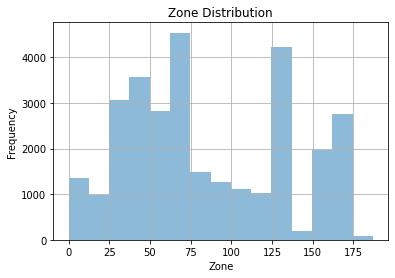

In [ ]:
inspect("Zone")

# RECORDING

## Variable 3: Partner

In [ ]:
inspect("Partner")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        partner_other
1        partner_other
2        partner_other
3            UNHabitat
4            UNHabitat
             ...      
32074              LRC
32075              LRC
32076              LRC
32077              LRC
32078              LRC
Name: Partner, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['partner_other' 'UNHabitat' 'LRC' 'Intersos' 'Save the Children' 'CWW'
 'Medair' 'PCPM' 'NRC' 'UNHCR' 'Leb-Relief' 'Solidarite' 'WFP' 'Unicef'
 'Acted' 'Concern' 'PU AMI' 'AAH' 'IOM' 'Nawaya' 'Lebanese_University'
 'Arcenciel' nan 'radi jarouch' 'Caritas']
-------------------------NUMBER OF MISSING VALUES----------------------------------
612
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.019077901430842606


## Variable 4: Introduction

In [ ]:
inspect("introduction")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
32074    yes
32075    yes
32076    yes
32077    yes
32078    yes
Name: introduction, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['yes' 'no' nan]
-------------------------NUMBER OF MISSING VALUES----------------------------------
7
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.00021821129087565074


# INTERVIEWEE

## Variable 5: Are you the Head of Household (i.e. the person responsible for providing for the people in this household)?

In [ ]:
#inspect("Are you the Head of Household (i.e. the person responsible for providing for the people in this household)?")
df["Are you the Head of Household (i.e. the person responsible for providing for the people in this household)?"] = toLowerCase(df, "Are you the Head of Household (i.e. the person responsible for providing for the people in this household)?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        yes
1        yes
2        yes
3        yes
4         no
        ... 
32074    yes
32075    yes
32076    yes
32077    yes
32078    yes
Name: Are you the Head of Household (i.e. the person responsible for providing for the people in this household)?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['yes' 'no' nan 'No' 'Yes']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1662
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05180959506219022


#### After changes

In [ ]:
inspect("Are you the Head of Household (i.e. the person responsible for providing for the people in this household)?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        yes
1        yes
2        yes
3        yes
4         no
        ... 
32074    yes
32075    yes
32076    yes
32077    yes
32078    yes
Name: Are you the Head of Household (i.e. the person responsible for providing for the people in this household)?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['yes' 'no' nan]
-------------------------NUMBER OF MISSING VALUES----------------------------------
1662
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05180959506219022


## Variable 6: What is the respondant's relationship to HoH:

In [ ]:
inspect("What is the respondant's relationship to HoH:")
#make lowercase
df["What is the respondant's relationship to HoH:"] = toLowerCase(df, "What is the respondant's relationship to HoH:")

------------------------------PRINT ALL AND TYPE-----------------------------------
0                 NaN
1                 NaN
2                 NaN
3                 NaN
4        wife/husband
             ...     
32074             NaN
32075             NaN
32076             NaN
32077             NaN
32078             NaN
Name: What is the respondant's relationship to HoH:, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'wife/husband' 'other' 'daughter/son' 'wife' 'Wife']
-------------------------NUMBER OF MISSING VALUES----------------------------------
28744
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.8960379064185292


####After changes

In [ ]:
df["What is the respondant's relationship to HoH:"] = toLowerCase(df, "What is the respondant's relationship to HoH:")
df["What is the respondant's relationship to HoH:"] = df["What is the respondant's relationship to HoH:"].replace('wife', 'wife/husband')
inspect("What is the respondant's relationship to HoH:")

------------------------------PRINT ALL AND TYPE-----------------------------------
0                 NaN
1                 NaN
2                 NaN
3                 NaN
4        wife/husband
             ...     
32074             NaN
32075             NaN
32076             NaN
32077             NaN
32078             NaN
Name: What is the respondant's relationship to HoH:, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'wife/husband' 'other' 'daughter/son']
-------------------------NUMBER OF MISSING VALUES----------------------------------
28744
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.8960379064185292


## Variable 7: Do you currently live here in this apartment/house?

In [ ]:
inspect("Do you currently live here in this apartment/house?")
df["Do you currently live here in this apartment/house?"] = toLowerCase(df, "Do you currently live here in this apartment/house?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
32074    yes
32075    yes
32076    yes
32077    yes
32078    yes
Name: Do you currently live here in this apartment/house?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['yes' nan 'no' 'Yes']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1663
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.051840768103743884


####After changes

In [ ]:
inspect("Do you currently live here in this apartment/house?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
32074    yes
32075    yes
32076    yes
32077    yes
32078    yes
Name: Do you currently live here in this apartment/house?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['yes' nan 'no']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1663
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.051840768103743884


## Variable 8,9: Location	| Other, please specify

In [ ]:
inspect("Location")

------------------------------PRINT ALL AND TYPE-----------------------------------
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
32074      ashrafieh
32075      ashrafieh
32076    Zqaq Elblat
32077      ashrafieh
32078       Bachoura
Name: Location, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'ashrafieh' 'Bachoura' 'Rmeil' 'Beirut Central District' 'Saifi'
 'Mdaouar' 'other' 'Zqaq Elblat' 'Marfa' 'Mina Elhosn']
-------------------------NUMBER OF MISSING VALUES----------------------------------
12324
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.38417656410735995


In [ ]:
# inspect("Other, please specify")
#Different spelling for same location. For example: borj, burj, bourj, Burj, Birj, Bourej/ Sin el fil, Sen El Fel, Sin lfill/ spelling in arabic
df["Other, please specify"] = df["Other, please specify"].str.strip()
df["Other, please specify"] = df["Other, please specify"].replace('\s+', ' ',regex=True)
df["Other, please specify"] = toLowerCase(df, "Other, please specify")
replacement_bags_pairs = {
                          "sin el fil": set(['son el fil', 'sen el', 'sin el fil', 'son el fil', "sin el fel", 'sin lfil' ,'sin al fil', 'sen l fil' ,'sin l fil','ain el fil', 'sin  fil', 'sin el fel', 'sinn el fil' ,'sinn ek fil', 'sinlfil', 'sein al fiel' ,'sin el feil' ,'sinel fil' ,'sin 3l fil', 'sin el phil', 'sun el fil' ,'sin lfel' ,'sin el fiñ', 'sin fil', 'sin' ,'sin el fild', 'sin el fol' ,'sin dl fil', 'sin el il', 'sin el filq' ,'sin el filp', 'sin e fil', 'sil el fil', 'sin elf fil', 'sin el til', 'sin el fin','sinel','sinelfi', 'sib el fil', 'zin el fil' ,'sin rl fil', 'sin  el fil', 'sin lfill', 'sen lfill', 'sin el fil', 'sinelfil', 'sin elfil', 'sen el fil', 'سن الفيل', 'sjn el fil', 'si el fil', 'sin el fill', 'sin el urgent', 'sin el fill', 'سن لفيل', ]),
                          "bourj hammoud": set(['burj hamoid','borge hamoud','bourj hamoud', 'borj hammoud', 'borj hamoud', 'برج حمود شارع كيليكيا', 'burj hammoud', 'برج حمود', 'برج حمود شارع حمود', 'شارع كيليكيا برج حمود', 'برج حمود شارع كيليكا', 'burj hammoud', 'برج حمود', 'برج حمود شارع حمود', 'شارع كيليكيا برج حمود', 'bourh hammoud', 'burj hamoud', 'برج حمود شارع كيليكا', 'burj hamud', 'bourj hammous', 'birj hammoud', 'bourej hamoud', 'bourj hammou', 'bourej hammoud', 'borj hmoud', 'برج حمود حارة صادر', 'برج حمود شارع صاد', 'burj hamud', 'bourj hammous', 'birj hammoud', 'برج حم', 'birj hamoud', 'born hammoud', 'bourk hamoud','bourj hammouf', 'bourjhamoud', 'bouj hamoud', 'berhamoud', 'bourj hammoud, maraash', 'برج الحمود', 'berj hamoud arax', 'bourj hammoue',  'berj hamoud', 'bourjhammoud', 'bourn hammoud', 'bourj hammoud, arax', 'برج حمود.', 'burj hamod', 'berj hamouf', 'berj hammoud', 'burj hamoood', 'borj hamod', 'burj hammod', 'bourj', 'borj hammod', 'borj hamood', 'bourj hammoid', 'burjhammod', 'burj hammud', 'borj hammoud0', 'biurj hammoud', 'barj hamoud', 'borj hammoid', 'borj hamud', 'barjhammod', 'bourj hammouc', 'burjj hamud', 'bour hammoud', 'borj houmd', 'borjhamoud', 'barjhamoud', 'burj hammous', 'burj hanmoud', 'borej hamoud', 'berej hammoud', 'bourjj hamoud', 'burj hamouf', 'burj barajne', 'both hammoud', 'berej hammud', 'bouri hammoud', 'borjhamud', 'berej hamoud', 'boroj hammoud', 'bourj hammoud zone 122', 'borj hamoud near mar youssef church', 'borj hammoud haret sader street', 'borj hammoud near mar youssef church', 'bork hammoud', 'bork hamoud', 'borj hammoud', 'bourj hammond', 'borj hamouud', 'bourj hammoud haret sader street', 'borj hammoud , mar youssef street', 'boutj hammoud', 'burj hamdoud', 'borj hammoud ,haret sader street', 'borj hammoud haret sader st', 'borj hammoud mar youssef church''bourhamoud', 'bourj hsmmoud', 'borj hammud', 'bej hamoud', 'berej hamouf', 'bourj hammoud l', 'borj hamoid', 'bofrj hamoud', 'bouj hammoud', 'borj hammoud armeina street', 'borj hampud', 'borj hamooud', 'borj hammoud adana street', 'borj hammoud dora street', 'borj hammoud , adana street', 'borj hammoud adana', 'borj hammoud, adana street', 'bonrj hammoud', 'borjhammud', 'boj hamud', 'bourj hanmoud', 'burj hammoud ya', 'borj hammoud armenia street', 'borj hammous , armenia street', 'bourj hammoud0', 'borj hammoud , armenia street', 'bourej hamou', 'borj hammoud, lebanese water company street', 'borj hammoud ,lebanese water company', 'boroj hamoud', 'bourj hamood', 'brj hammoud', 'burj hammoud ya te to un', 'borj hmmoud', 'borj hammoud haret sader', 'bourja hammoud', 'bourj hammoud zone 121', 'bourj hammmoud', 'bourj hammoud - armenian red cross', 'bourj hammoud - near armanian red cross', 'borj hammoud near armenian red cross', 'bourj hamouf', 'burj hamoudi', 'borj hanmoud', 'bprj hammoud', 'berj hamud', 'burj hammiud', 'burj hanoud', 'burj hsmud', 'برج حمود شارع صادر', 'برج حمود جارع كيليكيا', 'برج حمود شارع مادونا', 'برج حمود شارع كنيسة مار يوسف', 'برج حمود شارع كويسة مار يوسف', 'برج حمود _شارع مادونا', 'برج حمود شارع السنترال', 'برج حمود جنب السنترال', 'برج حمو', 'برج الحمو', 'برج حمود/ شارع طرابلس', 'بىج حمود', 'برج حمودط', 'برج حمود منطقة شارع ٧٦ الطابق الارضي قرب شركة المياه', 'برج حمود/ شارع طومرزا', 'برج حمود/ شارع طمورزا','برج حمود/ شارع الصادر', 'borj hammoud,haret saber street', 'borj hammoud mar youssef church', 'bourhamoud', 'يرج حمود', 'berj hammof', ]),
                          "zkak l blat": set(['z2a2 al blat','z2a2 al blad', 'zkak el blat','zkak al blat' 'z2a2 al blad', "zkak blat", "zkak l blat", "zkak lblat", 'z2a2 al blad' 'z2a2 al blat']),
                          "khandak el ghamee2": set(['khanda2', 'khandaa',"khandak el khame2", "خندق الغميق", 'khandak el ghamee2', 'khanda2 gham2', 'khanda2 ghami2', 'ghanda2 ghami2', 'khnda2', 'khanda2 l ghami2', 'khandak ghamik', 'khandak', 'khanda2 lghamii', 'khandk', 'khanda2 l ghamii', 'khandaa l ghamii']),
                          "bachoura": set(["الباشورة"]),
                          "gemmayze": set(['gemeyze',"gemmayze", "gemeyzeh", "jenayzeh", "gemaize", 'gemmayaze', 'gemmeyaze', 'jemmayze', "gemayze", "jemayze", "jemayzeh", "jemmayzeh", 'gemmayzeh near redcross 202', 'gemayzeh', 'جميزة', 'gemmayzeh near rc 202']),
                          "basta tahta": set(['basta el tahta','basta al tahta bachoura','basta tahta fathallah street',"البسطة التحتا", "بسطة التحتة", 'basta tahta','basar el tahta', 'basra el tahta', 'basta l tahta', 'bosta al tahta', 'basta al tahta', 'basra l tahta', 'basta al tahta fathallah street','bssta','nasta l tahta','bast tahta','basta-al tahta']),
                          "karm zaytoun": set(['karem al zaytoun',"karm el zeitoun",'karm zaitoun','karem l zaytoun','karm el zaytoun','karm e zaytoun','karam el zaytoun','karem l zeitoun','karam zaytoun']),

                          "carantina": set(['karantona','karentina','karangina','karatina','karantin','quarantin', 'karntina', 'quarantina', 'quarantine', 'carantina', 'qurantine', "karantina", 'karntina' 'quarantina' 'quarantine', 'karantine', 'karanteena', 'karnteena', 'karsntins', 'كرنتينا', 'karamteena', 'karantena', 'karnatina', 'karantinz', 'krntina', 'ka4antina']),
                          "mar mkhayel": set(['mar m5ayil rabat street', 'mar mikheal', 'mar mkhayel churche', 'mar mkhayel', 'mar m5ayel', 'mar mkhyel', 'mar mkheyal', 'mar mkhail', 'mar mkail', 'mar mhkayel', 'marmkhayel', 'mar mkhael', 'mar mkhayl', 'mar mikeal', 'marmkhyael', 'mar mkhayal', 'marmkhayl', 'mar mkheael', "mar mkheyeil", "مارمخايل", "مارم مخايل", 'mar m5ayel' 'mar mkhyel', "mar mikhael", "mar mikhaiel"]),
                          "ras lnabah": set(['ras al nabeh','ras el nabeh','rass nabaa','ras nabaa','ras al nabea','ras al nabeh','ras al nabaa','ras l nabeh', 'ras lnabeh', 'ras nabeh', 'ras elnabaa', "ras nabe3", "ras nabea",  'ras el nabee']),
                          "mar3ach": set(['maraash', 'مرعش']),
                          "dora": set(['dora', 'dawra']),
                          "borj el barajneh": set(['borj al barajne', 'borj al barajni', ]),
                          "borj abi haidar": set([ 'borj abj haidar','borj abou haydar','berj abu haydar','burj abi haidar','burj abi haidet','boroj abi haidar','burj abi hayder','berj abi haidar', 'burj abou haydar', 'bourj abi haidar', "برج اب حيدر", 'bourj abi haydar', 'bourj abj haidar', "برج ابو حيدر", "borj abu haidar", 'burj haydar', 'burj abi haydar']),
                          

                          "cornich el naher": set(['cornich al naher']),
                          "msaitbe": set(['msaitbe','msaytbeh mar elias','mousaitbeh karkol el druz','moussaitbeh', 'mousseitbeh', 'msaibte', 'msaibti', 'msaitbe', 'مصيطبي', 'المصيطبى', 'المصيطبه', 'msaitbi', 'مصيطبة', 'msaytbi, saeb slam street', 'msaytbi semaan street, hashem meghnye building', 'maaytbe', 'mousaitbeh','masitbe','mseitbeh', 'msaitbii', 'mseibeh', 'mseitbe', 'moaaitbe', 'mositbe', 'moustaitbeh', 'musaitbeh', 'masitbeh', 'msaybeh', 'mouseitbeh', 'mousaitbah', 'المصيطبي١', 'mousaitibeh', 'msaythe', 'mousaytbe', 'mosaytbe', 'mosaytbeh', 'misaytbeh', 'mousqytbe', 'mosaitbeh','المسيطبة', 'mseibe', 'mosaitbe', 'mosaibte', 'المصيطبي', 'msaytbi', 'msytbe', 'msaitbeh', 'مصيطبه', 'msaytbe', 'msaytbeh', 'mousaitbe']),
                          'getaoui': set(['getaoui', 'geitawa', 'getawi', 'geatawi', 'jeatawi', 'j3eytewe', 'j3itawi', 'geutawi sher3 asho3', 'geitawi', 'jeitawi', 'geitaoui', 'geoutawi', 'geatawi', 'jeatawi', 'j3eytewe', 'j3itawi', 'jeitewe', 'j3itewe','joutewi', 'gitawi', 'joutewe', 'j3itewi', 'jetawe', 'joueitawi', 'geytaoi', 'geotaoui']),
                          "tari2 jdide": set(['taree2 jdede','tari2 jdide , bohsali', 'tarik jdide', 'tariq jadede', 'tariq jdede', 'tari2 jdideh']),
                          "furn l chebbek": set(['furn el chebak']),
                          'mazraa': set(['mazra3a','mazras','مزرعه','mazraq','maraa','mazrra','al mazraa','mazeaa','marzraa']),
                          'basta faw2a': set(['basta fawka', 'basta el faw2a','basta al fawka' 'basta fawqa','al basta al fawka','البسطا الفوقا', 'mazraa,basta al fawka' ,'basta l fawka']),

                          'salim sleim': set(['salim slam','salim salam','salem slam']),                          
                          "furn l chebbek": set(['furn el chebak']),
                          "basta": set(['baata', 'bassta', 'al basta']),



                          }

for replacement in replacement_bags_pairs.keys():
  wordBag = replacement_bags_pairs[replacement]
  df["Other, please specify"] = replaceWordSet(df, "Other, please specify", wordBag, replacement)

####After changes

In [ ]:
inspect("Other, please specify")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Other, please specify, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'gemmayze' 'khandak el ghamee2' 'basta tahta' 'karm zaytoun'
 'bourj hammoud' 'bachoura' 'al zahrawi' 'zkak l blat' 'carantina'
 'mar mkhayel' 'النبعة' 'ras lnabah' 'sin el fil' 'برج حارة حارة صادق'
 'iom' 'mar3ach' 'arax' 'شارع العريض' 'شارع طرابلس'
 'شارع طرابلس قسيس الدورة' 'شارع ارمينية' 'الدورة' 'الدورة شارع ارمينيا'
 'شارع عيد' 'شارع الاخطل جنب عقيل اخوان قرب شلالا' 'زقيق البلاط'
 'salim slem' 'nigeria' 'نبع' 'nabaa' '1' 'شارع السنترال' 'شلرع السنترال'
 'قرب سنترال اوجيرو' 'شارع عقيل' 'شارع ارمينيا' 'قرب big sale'
 'شارع السنترال بناية أداميان' 'شارع السنترال بناية اتاميان'
 'جانب مكتب الشرق الاوسط' 'بناية فلفلة 

In [ ]:
len(pd.unique(df["Other, please specify"]))

230

## Variable 10: Year

------------------------------PRINT ALL AND TYPE-----------------------------------
0           NaN
1           NaN
2           NaN
3        1957.0
4        1960.0
          ...  
32074    1945.0
32075    1993.0
32076    1960.0
32077    1947.0
32078    1977.0
Name: Year, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 1906.0
MAX 2004.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
2583
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.08051996633311512
-------------------------DISTRIBUTION OF VALUES---------------------------------


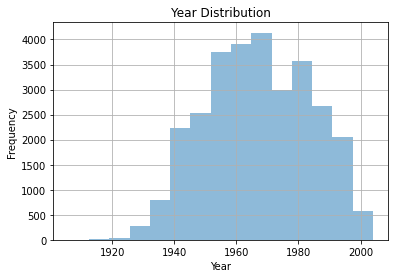

In [ ]:
inspect("Year")

## Variable 11: Gender

In [ ]:
inspect("Gender")
df["Gender"] = toLowerCase(df, "Gender")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        female
1        female
2        female
3          male
4        female
          ...  
32074    female
32075      male
32076    female
32077      male
32078    female
Name: Gender, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['female' 'male' nan 'other' 'prefer_not_to_say' 'Female']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1669
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05202780635306587


####After changes

In [ ]:
inspect("Gender")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        female
1        female
2        female
3          male
4        female
          ...  
32074    female
32075      male
32076    female
32077      male
32078    female
Name: Gender, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['female' 'male' nan 'other' 'prefer_not_to_say']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1669
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05202780635306587


## Variable 12: Marital Status

In [ ]:
inspect("Marital Status")
#Make lower
df["Marital Status"] = toLowerCase(df, "Marital Status")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        married
1        married
2        married
3        married
4        married
          ...   
32074      widow
32075    married
32076    married
32077    married
32078    married
Name: Marital Status, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['married' 'widow' 'single' nan 'married_separated_from_partner'
 'living_with_partner' 'married_living_with_partner' 'Married']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1669
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05202780635306587


####After changes

In [ ]:
inspect("Marital Status")


------------------------------PRINT ALL AND TYPE-----------------------------------
0        married
1        married
2        married
3        married
4        married
          ...   
32074      widow
32075    married
32076    married
32077    married
32078    married
Name: Marital Status, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['married' 'widow' 'single' nan 'married_separated_from_partner'
 'living_with_partner' 'married_living_with_partner']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1669
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05202780635306587


# HOUSEHOLD HEALTH, AGE, MEDICAL CONDITION

## Variable 13,14: 	Nationality of household | Other, please specify2

In [ ]:
inspect("Nationality of household")
#Make lower and also "lebanese " vs "lebanese"
df["Nationality of household"] = toLowerCase(df, "Nationality of household")
df["Nationality of household"] = df["Nationality of household"].str.strip()
df["Nationality of household"] = df["Nationality of household"].replace('lebanese ', 'lebanese')


------------------------------PRINT ALL AND TYPE-----------------------------------
0        lebanese
1        lebanese
2        lebanese
3        lebanese
4        lebanese
           ...   
32074    lebanese
32075      syrian
32076    lebanese
32077    lebanese
32078    lebanese
Name: Nationality of household, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['lebanese' nan 'ethiopian' 'syrian' 'other' 'iraqi' 'bangladesh'
 'palestinian' 'sudanese' 'philippines']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1770
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05517628354998597


####After changes

In [ ]:
inspect("Nationality of household")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        lebanese
1        lebanese
2        lebanese
3        lebanese
4        lebanese
           ...   
32074    lebanese
32075      syrian
32076    lebanese
32077    lebanese
32078    lebanese
Name: Nationality of household, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['lebanese' nan 'ethiopian' 'syrian' 'other' 'iraqi' 'bangladesh'
 'palestinian' 'sudanese' 'philippines']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1770
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05517628354998597


In [ ]:
inspect("Other, please specify2")
#Written in arabic
df["Other, please specify2"] = df["Other, please specify2"].str.strip()
df["Other, please specify2"] = toLowerCase(df, "Other, please specify2")
replacement_bags_pairs = {"lebanese": set(['sin el fil', 'مزرعه', 'سن الفيل', 'المصيطبي', 'mousaytbe']),
                          "sri lankan":set(["سيرلنكا", "سيريلانكا", "sirilinka", "syrelinka", 'serilanka', 'serlankap', 'srilankan', 'sirilanka', 'sirlanka', "sri lanka" ]),
                          "armenian": set(["ارمنية", 'armani', 'ارمني', 'أرمني', 'ارمنب', 'armanian', 'arminia']),
                          "madagascar": set(["madaghashkar", 'madagasikara', 'madagaskar']),
                          "egyptian": set(["egypt", 'egypt', 'egyption', 'egypian', 'eygption', 'egypthian', 'egytian', 'egyptan', 'eghyptian', 'égyptienne', 'مصري', 'مصر']),
                          "jordanian": set(["jordan", 'اردن']),
                          "nigerian": set(["nigeria", 'nigirian', 'nigiria', 'نيجيريا']),
                          "moroccan": set(["مغربية", 'مغربيhh']),
                          "pakistani": set(["pakestani", 'باكستاني']),
                          "sierra leonean": set(["sierra leone", 'sierra-leone', 'seralion']),
                          "sudanese": set(["soudan", 'sudanian', 'sudan', 'swdani']),
                          "cameroonian": set(['cameroon', 'cameron', 'camiron']),
                          "kuwaiti": set(['كويت']),
                          "french": set(['french', 'فرنسي']),
                          "bangladeshi": set(['bangali', 'bangladich']),
                          "turkish": set(['turkish00', 'tukish']),
                          "greek": set(['يونانية', 'greece']),
                          "brazilian": set(['brazil', 'brazilian']),
                          "ethiopian": set(['ethupia', 'utopia']),
                          "thai": set(['tailend', 'thaïlandaise']),
                          "palestinian": set(['palestanian']),
                          "iranian": set(['irani']),
                          "kenyan": set(['kenya', 'republic of kenya']),
                          "senegalese": set(['sinegal']),
                          "belgian": set(['belgium', 'republic of kenya']),
                          "somali": set(['soumal']),
                          "british": set(['uk', 'english']),
                          "indian": set(['hindi']),
                          }

for replacement in replacement_bags_pairs.keys():
  wordBag = replacement_bags_pairs[replacement]
  df["Other, please specify2"] = replaceWordSet(df, "Other, please specify2", wordBag, replacement)

df["Other, please specify2"] = df["Other, please specify2"].replace('na', np.nan)
df["Other, please specify2"] = df["Other, please specify2"].replace('yamanr', "yemeni")

  
#Sudan vs sudanese
#Different spelling: sirilinka/serilanka/serlankap/Sirilanka

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Other, please specify2, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'sri lankan' 'finland' 'egyptian' 'french' 'chinese' 'italian'
 'japanese' 'iranian' 'algerian' 'jordanian' 'american' 'swiss' 'greek'
 'cameroonian' 'malagasy' 'kenyan' 'nigerian' 'armenian' 'arab'
 'madagascar' 'turkish' 'sudanese' 'bolimia' 'kuwaiti' 'thai'
 'sierra leonean' 'oganda' 'senegalese' 'ethiopian' 'moroccan'
 'bangladeshi' 'lebanese' "côte d'ivoire" 'canada' 'british' 'syrian'
 'belgian' 'australian' 'german' 'spanish' 'slovako' 'pakistani' 'georgia'
 'romanian' 'indian' 'russian' 'venezuella' 'taiwan' 'philipines'
 'kurdish' 'brazilian' 'canadian' 'ghana' 'polish' 'danish' 'ukraine'
 'netherlands' 'yeme

####After changes

In [ ]:
inspect("Other, please specify2")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Other, please specify2, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'sri lankan' 'finland' 'egyptian' 'french' 'chinese' 'italian'
 'japanese' 'iranian' 'algerian' 'jordanian' 'american' 'swiss' 'greek'
 'cameroonian' 'malagasy' 'kenyan' 'nigerian' 'armenian' 'arab'
 'madagascar' 'turkish' 'sudanese' 'bolimia' 'kuwaiti' 'thai'
 'sierra leonean' 'oganda' 'senegalese' 'ethiopian' 'moroccan'
 'bangladeshi' 'lebanese' "côte d'ivoire" 'canada' 'british' 'syrian'
 'belgian' 'australian' 'german' 'spanish' 'slovako' 'pakistani' 'georgia'
 'romanian' 'indian' 'russian' 'venezuella' 'taiwan' 'philipines'
 'kurdish' 'brazilian' 'canadian' 'ghana' 'polish' 'danish' 'ukraine'
 'netherlands' 'yeme

## Variable 15: Total number of members living now under the same roof (INCLUDING Head of Household)	

------------------------------PRINT ALL AND TYPE-----------------------------------
0        3.0
1        1.0
2        2.0
3        5.0
4        4.0
        ... 
32074    5.0
32075    4.0
32076    3.0
32077    3.0
32078    5.0
Name: Total number of members living now under the same roof (INCLUDING Head of Household), Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 213.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
73
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.0022756320334175006
-------------------------DISTRIBUTION OF VALUES---------------------------------


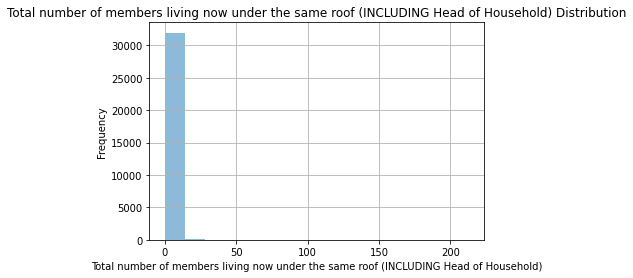

In [ ]:
inspect("Total number of members living now under the same roof (INCLUDING Head of Household)")

## Variable 16: Total number of members over age 60                                                                              

------------------------------PRINT ALL AND TYPE-----------------------------------
0        2.0
1        0.0
2        1.0
3        2.0
4        1.0
        ... 
32074    1.0
32075    0.0
32076    2.0
32077    2.0
32078    0.0
Name: Total number of members over age 60, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 51.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
1684
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.052495401976370835
-------------------------DISTRIBUTION OF VALUES---------------------------------


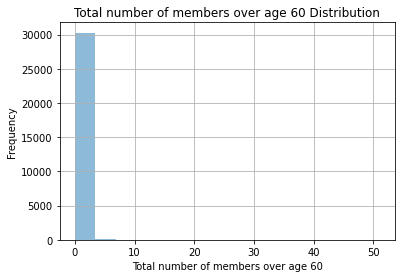

In [ ]:
inspect("Total number of members over age 60")

## Variable 17: Total number of members between age 18 to 60 

------------------------------PRINT ALL AND TYPE-----------------------------------
0        1.0
1        1.0
2        1.0
3        3.0
4        2.0
        ... 
32074    2.0
32075    2.0
32076    1.0
32077    1.0
32078    3.0
Name: Total number of members between age 18 to 60, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 54.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
1681
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05240188285170984
-------------------------DISTRIBUTION OF VALUES---------------------------------


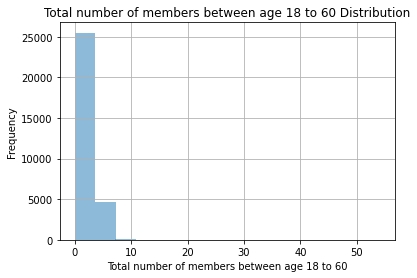

In [ ]:
inspect("Total number of members between age 18 to 60")

## Variable 18: Total number of members less than 18      

------------------------------PRINT ALL AND TYPE-----------------------------------
0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
32074    2.0
32075    1.0
32076    0.0
32077    0.0
32078    2.0
Name: Total number of members less than 18, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 31.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
1702
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.0530565167243368
-------------------------DISTRIBUTION OF VALUES---------------------------------


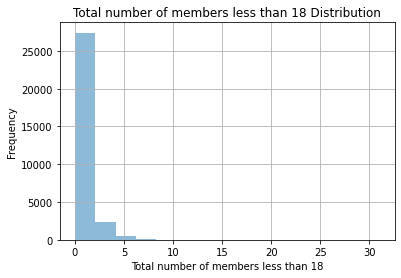

In [ ]:
inspect("Total number of members less than 18")

## Variable 19: added_members

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    5.0
32075    4.0
32076    3.0
32077    3.0
32078    5.0
Name: added_members, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 28.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
12314
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.38386483369182334
-------------------------DISTRIBUTION OF VALUES---------------------------------


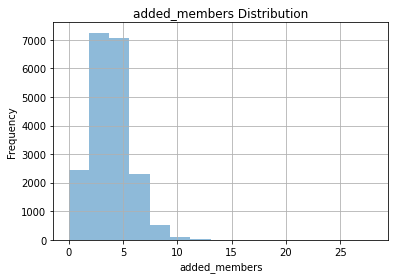

In [ ]:
inspect("added_members")

## Variable 20: Are any of your family members pregnant or lactating?                                                              

In [ ]:
inspect("Are any of your family members pregnant or lactating?")
df["Are any of your family members pregnant or lactating?"] = toLowerCase(df, "Are any of your family members pregnant or lactating?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        no
1        no
2        no
3        no
4        no
         ..
32074    no
32075    no
32076    no
32077    no
32078    no
Name: Are any of your family members pregnant or lactating?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['no' nan 'yes' 'refuse_to_answer' 'Yes']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1672
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05212132547772686


####After changes

In [ ]:
inspect("Are any of your family members pregnant or lactating?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        no
1        no
2        no
3        no
4        no
         ..
32074    no
32075    no
32076    no
32077    no
32078    no
Name: Are any of your family members pregnant or lactating?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['no' nan 'yes' 'refuse_to_answer']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1672
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05212132547772686


## Variable 21: Number of pregnant or lactating women

------------------------------PRINT ALL AND TYPE-----------------------------------
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
32074   NaN
32075   NaN
32076   NaN
32077   NaN
32078   NaN
Name: Number of pregnant or lactating women, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 9.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
30801
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.9601608528944169
-------------------------DISTRIBUTION OF VALUES---------------------------------


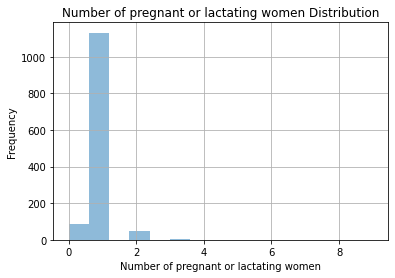

In [ ]:
inspect("Number of pregnant or lactating women")

##Variable 23, 24: Does any of them need woman and child health? (Gynecological support, breastfeeding support, vaccination, etc.) | How many members

In [ ]:
inspect("Does any of them need woman and child health? (Gynecological support, breastfeeding support, vaccination, etc.)")
#Make lower
df["Does any of them need woman and child health? (Gynecological support, breastfeeding support, vaccination, etc.)"] = toLowerCase(df, "Does any of them need woman and child health? (Gynecological support, breastfeeding support, vaccination, etc.)")


------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Does any of them need woman and child health? (Gynecological support, breastfeeding support, vaccination, etc.), Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'yes' 'no' 'No']
-------------------------NUMBER OF MISSING VALUES----------------------------------
30873
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.9624053118862808


####After changes

In [ ]:
inspect("Does any of them need woman and child health? (Gynecological support, breastfeeding support, vaccination, etc.)")


------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Does any of them need woman and child health? (Gynecological support, breastfeeding support, vaccination, etc.), Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'yes' 'no']
-------------------------NUMBER OF MISSING VALUES----------------------------------
30873
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.9624053118862808


------------------------------PRINT ALL AND TYPE-----------------------------------
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
32074   NaN
32075   NaN
32076   NaN
32077   NaN
32078   NaN
Name: How many members, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 7.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
31650
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.986626765173478
-------------------------DISTRIBUTION OF VALUES---------------------------------


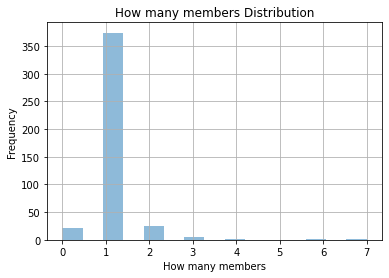

In [ ]:
inspect("How many members")

## Variable 25: Are any of the children in the household separated or unaccompanied?

In [ ]:
inspect("Are any of the children in the household separated or unaccompanied?")
#Make lower)
df["Are any of the children in the household separated or unaccompanied?"] = toLowerCase(df, "Are any of the children in the household separated or unaccompanied?")


------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4         no
        ... 
32074     no
32075     no
32076    NaN
32077    NaN
32078     no
Name: Are any of the children in the household separated or unaccompanied?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'no' 'yes' 'refuse_to_answer' 'No']
-------------------------NUMBER OF MISSING VALUES----------------------------------
13794
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.4300009351912466


####After changes

In [ ]:
inspect("Are any of the children in the household separated or unaccompanied?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4         no
        ... 
32074     no
32075     no
32076    NaN
32077    NaN
32078     no
Name: Are any of the children in the household separated or unaccompanied?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'no' 'yes' 'refuse_to_answer']
-------------------------NUMBER OF MISSING VALUES----------------------------------
13794
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.4300009351912466


## Variable 26: Number of separated minors (related to the family, i.e. nephew)

------------------------------PRINT ALL AND TYPE-----------------------------------
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
32074   NaN
32075   NaN
32076   NaN
32077   NaN
32078   NaN
Name: Number of separated minors (related to the family, i.e. nephew), Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 16.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
31722
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.9888712241653418
-------------------------DISTRIBUTION OF VALUES---------------------------------


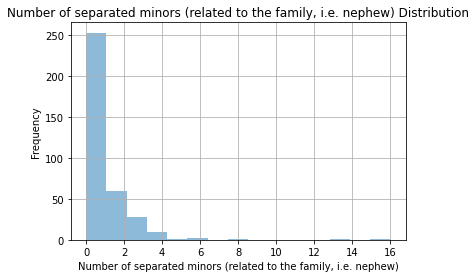

In [ ]:
inspect("Number of separated minors (related to the family, i.e. nephew)")

## Variable 27: Number of unaccompanied minors (not related, i.e. orphan)

------------------------------PRINT ALL AND TYPE-----------------------------------
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
32074   NaN
32075   NaN
32076   NaN
32077   NaN
32078   NaN
Name: Number of unaccompanied minors (not related, i.e. orphan), Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 6.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
31723
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.9889023972068954
-------------------------DISTRIBUTION OF VALUES---------------------------------


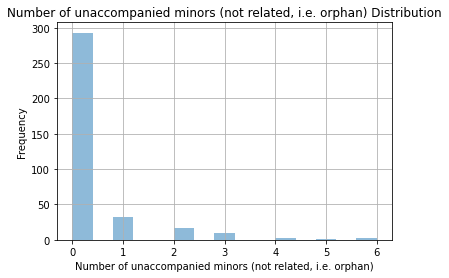

In [ ]:
inspect("Number of unaccompanied minors (not related, i.e. orphan)")

## Variable 28: Does anyone have a chronic illness or critical medical condition? 

In [ ]:
inspect("Does anyone have a chronic illness or critical medical condition?")
#Make lower
df["Does anyone have a chronic illness or critical medical condition?"] = toLowerCase(df, "Does anyone have a chronic illness or critical medical condition?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0         no
1        yes
2         no
3         no
4        yes
        ... 
32074    yes
32075     no
32076    yes
32077    yes
32078    yes
Name: Does anyone have a chronic illness or critical medical condition?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['no' 'yes' nan 'refuse_to_answer' 'No']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1672
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05212132547772686


####After changes

In [ ]:
inspect("Does anyone have a chronic illness or critical medical condition?")


------------------------------PRINT ALL AND TYPE-----------------------------------
0         no
1        yes
2         no
3         no
4        yes
        ... 
32074    yes
32075     no
32076    yes
32077    yes
32078    yes
Name: Does anyone have a chronic illness or critical medical condition?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['no' 'yes' nan 'refuse_to_answer']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1672
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05212132547772686


## Variable 29: Number chronically ill people/with critical medical conditions

------------------------------PRINT ALL AND TYPE-----------------------------------
0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
32074    1.0
32075    0.0
32076    1.0
32077    2.0
32078    1.0
Name: Number chronically ill people/with critical medical conditions, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 11111.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
4470
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.13934349574487984
-------------------------DISTRIBUTION OF VALUES---------------------------------


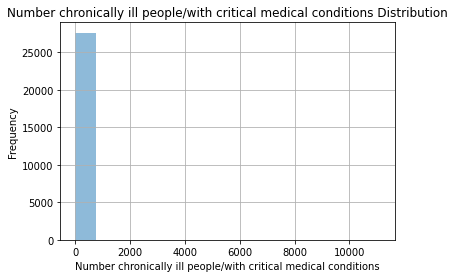

In [ ]:
inspect("Number chronically ill people/with critical medical conditions")

## Variable 30: Is any member of your family identified with COVID-19 or experienced flu-like symptoms or have been in contact with a COVID-19 positive case in the previous 14 days?

In [ ]:
inspect("Is any member of your family identified with COVID-19 or experienced flu-like symptoms or have been in contact with a COVID-19 positive case in the previous 14 days?")
#Make lower
df["Is any member of your family identified with COVID-19 or experienced flu-like symptoms or have been in contact with a COVID-19 positive case in the previous 14 days?"] = toLowerCase(df, "Is any member of your family identified with COVID-19 or experienced flu-like symptoms or have been in contact with a COVID-19 positive case in the previous 14 days?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0         no
1         no
2         no
3         no
4         no
        ... 
32074     no
32075     no
32076    yes
32077     no
32078     no
Name: Is any member of your family identified with COVID-19 or experienced flu-like symptoms or have been in contact with a COVID-19 positive case in the previous 14 days?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['no' nan 'yes' 'No']
-------------------------NUMBER OF MISSING VALUES----------------------------------
2984
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.09302035599613455


####After changes

In [ ]:
inspect("Is any member of your family identified with COVID-19 or experienced flu-like symptoms or have been in contact with a COVID-19 positive case in the previous 14 days?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0         no
1         no
2         no
3         no
4         no
        ... 
32074     no
32075     no
32076    yes
32077     no
32078     no
Name: Is any member of your family identified with COVID-19 or experienced flu-like symptoms or have been in contact with a COVID-19 positive case in the previous 14 days?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['no' nan 'yes']
-------------------------NUMBER OF MISSING VALUES----------------------------------
2984
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.09302035599613455


## Variable 31: Does anyone have a physical or mental disability?

In [ ]:
inspect("Does anyone have a physical or mental disability?")
#Make lower
df["Does anyone have a physical or mental disability?"] = toLowerCase(df, "Does anyone have a physical or mental disability?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0         no
1         no
2         no
3         no
4        yes
        ... 
32074     no
32075     no
32076     no
32077     no
32078     no
Name: Does anyone have a physical or mental disability?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['no' 'yes' nan 'refuse_to_answer' 'No']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1674
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05218367156083419


####After changes

In [ ]:
inspect("Does anyone have a physical or mental disability?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0         no
1         no
2         no
3         no
4        yes
        ... 
32074     no
32075     no
32076     no
32077     no
32078     no
Name: Does anyone have a physical or mental disability?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['no' 'yes' nan 'refuse_to_answer']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1674
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05218367156083419


## Variable 32: Number with non-disaster related physical and permanent disability

------------------------------PRINT ALL AND TYPE-----------------------------------
0        0.0
1        0.0
2        0.0
3        0.0
4        2.0
        ... 
32074    0.0
32075    0.0
32076    0.0
32077    0.0
32078    0.0
Name: Number with non-disaster related physical and permanent disability, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 13.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
6670
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.20792418716294148
-------------------------DISTRIBUTION OF VALUES---------------------------------


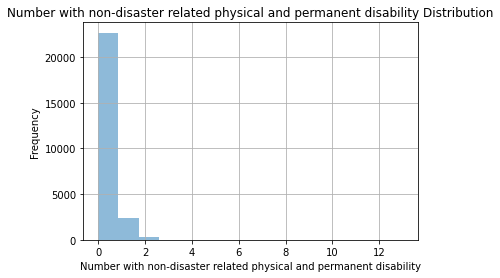

In [ ]:
inspect("Number with non-disaster related physical and permanent disability")

## Variable 33: Number with disaster related physical and permanent disability

------------------------------PRINT ALL AND TYPE-----------------------------------
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32074    0.0
32075    0.0
32076    0.0
32077    0.0
32078    0.0
Name: Number with disaster related physical and permanent disability, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN -1.0
MAX 24575.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
6670
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.20792418716294148
-------------------------DISTRIBUTION OF VALUES---------------------------------


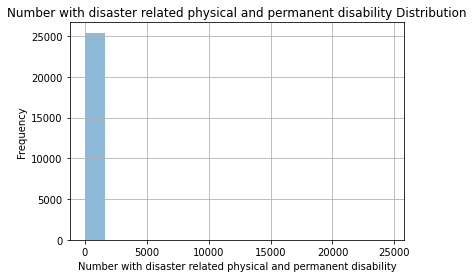

In [ ]:
inspect("Number with disaster related physical and permanent disability")
# Negative values ?

## Variable 34: Does any member of your family need immediate first aid support?

In [ ]:
inspect("Does any member of your family need immediate first aid support?")
#Make lower
df["Does any member of your family need immediate first aid support?"] = toLowerCase(df, "Does any member of your family need immediate first aid support?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0         no
1         no
2         no
3         no
4         no
        ... 
32074    yes
32075     no
32076     no
32077     no
32078     no
Name: Does any member of your family need immediate first aid support?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['no' nan 'yes' 'No']
-------------------------NUMBER OF MISSING VALUES----------------------------------
2984
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.09302035599613455


####After changes

In [ ]:
inspect("Does any member of your family need immediate first aid support?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0         no
1         no
2         no
3         no
4         no
        ... 
32074    yes
32075     no
32076     no
32077     no
32078     no
Name: Does any member of your family need immediate first aid support?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['no' nan 'yes']
-------------------------NUMBER OF MISSING VALUES----------------------------------
2984
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.09302035599613455


## Variable 35, 36: Does any member of your family need chronic medications/healthcare? | How many members4

In [ ]:
inspect("Does any member of your family need chronic medications/healthcare?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        yes
1        yes
2         no
3         no
4         no
        ... 
32074    yes
32075     no
32076    yes
32077    yes
32078    yes
Name: Does any member of your family need chronic medications/healthcare?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['yes' 'no' nan]
-------------------------NUMBER OF MISSING VALUES----------------------------------
2631
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.08201627232769101


------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        1.0
2        NaN
3        NaN
4        NaN
        ... 
32074    1.0
32075    0.0
32076    1.0
32077    2.0
32078    1.0
Name: How many members4, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 28.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
7887
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.24586177873375106
-------------------------DISTRIBUTION OF VALUES---------------------------------


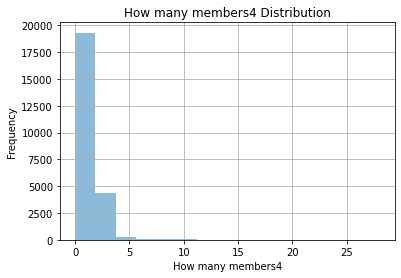

In [ ]:
inspect("How many members4")

## Variable 37: Do your family has access to healthcare or medication since the incident? | Why?

In [ ]:
inspect("Do your family has access to healthcare or medication since the incident?")
#Make lower
df["Do your family has access to healthcare or medication since the incident?"] = toLowerCase(df, "Do your family has access to healthcare or medication since the incident?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0         yes
1         yes
2         yes
3         yes
4        none
         ... 
32074     yes
32075     yes
32076     yes
32077     yes
32078    none
Name: Do your family has access to healthcare or medication since the incident?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['yes' 'none' 'partial' nan 'None']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1672
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05212132547772686


####After changes

In [ ]:
inspect("Do your family has access to healthcare or medication since the incident?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0         yes
1         yes
2         yes
3         yes
4        none
         ... 
32074     yes
32075     yes
32076     yes
32077     yes
32078    none
Name: Do your family has access to healthcare or medication since the incident?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['yes' 'none' 'partial' nan]
-------------------------NUMBER OF MISSING VALUES----------------------------------
1672
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05212132547772686


In [ ]:
inspect("Why?")
# Since people can choose more than one option, its taking each combination of options as a different value

------------------------------PRINT ALL AND TYPE-----------------------------------
0                                NaN
1                                NaN
2                                NaN
3                                NaN
4        can't_afford_it_financially
                    ...             
32074                            NaN
32075                            NaN
32076                            NaN
32077                            NaN
32078    can't_afford_it_financially
Name: Why?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan "can't_afford_it_financially"
 "can't_afford_it_financially,no/not_enough_healthcare_centers,denied_access_covid,no_transportation_available"
 'no/not_enough_healthcare_centers' 'family_doesnt_need_healthcare'
 "can't_afford_it_financially,family_doesnt_need_healthcare"
 "can't_afford_it_financially,no/not_enough_healthcare_centers"
 'no_transportation_available' 'denied_acces

# WATER

## Variable 38: What is the source of cooking/drinking water since the incident? 

In [ ]:
inspect("What is the source of cooking/drinking water since the incident?")
# Since people can choose more than one option, its taking each combination of options as a different value

------------------------------PRINT ALL AND TYPE-----------------------------------
0                                public_filtered_water
1        public_filtered_water,purchased_mineral_water
2                                public_filtered_water
3                              purchased_mineral_water
4               public_tank/reservoir,unprotected_well
                             ...                      
32074    purchased_mineral_water,public_filtered_water
32075                          purchased_mineral_water
32076                          purchased_mineral_water
32077    public_filtered_water,purchased_mineral_water
32078                          purchased_mineral_water
Name: What is the source of cooking/drinking water since the incident?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['public_filtered_water' 'public_filtered_water,purchased_mineral_water'
 'purchased_mineral_water' 'public_tank/reservoir,unp

## Variable 39: What is the source of washing water? 

In [ ]:
inspect("What is the source of washing water?")
# Since people can choose more than one option, its taking each combination of options as a different value

------------------------------PRINT ALL AND TYPE-----------------------------------
0                                public_filtered_water
1                                public_filtered_water
2                                public_filtered_water
3                              purchased_mineral_water
4               public_tank/reservoir,unprotected_well
                             ...                      
32074    purchased_mineral_water,public_filtered_water
32075                          purchased_mineral_water
32076    purchased_mineral_water,public_filtered_water
32077                            public_tank/reservoir
32078                            public_tank/reservoir
Name: What is the source of washing water?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['public_filtered_water' 'purchased_mineral_water'
 'public_tank/reservoir,unprotected_well' 'protected_well' nan
 'public_tank/reservoir' 'public_filtere

## Variable 40, 41: Is the water supply functioning in the apartment/ house? (Assuming functional prior to blast) | Why not?

In [ ]:
inspect("Is the water supply functioning in the apartment/ house? (Assuming functional prior to blast)")
#Make lower
df["Is the water supply functioning in the apartment/ house? (Assuming functional prior to blast)"] = toLowerCase(df, "Is the water supply functioning in the apartment/ house? (Assuming functional prior to blast)")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
32074    yes
32075    yes
32076    yes
32077    yes
32078    yes
Name: Is the water supply functioning in the apartment/ house? (Assuming functional prior to blast), Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['yes' nan 'water_supply_not_functional_prior' 'no' 'Yes']
-------------------------NUMBER OF MISSING VALUES----------------------------------
2629
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.08195392624458368


####After changes

In [ ]:
inspect("Is the water supply functioning in the apartment/ house? (Assuming functional prior to blast)")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
32074    yes
32075    yes
32076    yes
32077    yes
32078    yes
Name: Is the water supply functioning in the apartment/ house? (Assuming functional prior to blast), Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['yes' nan 'water_supply_not_functional_prior' 'no']
-------------------------NUMBER OF MISSING VALUES----------------------------------
2629
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.08195392624458368


In [ ]:
inspect("Why not?")
# Since people can choose more than one option, its taking each combination of options as a different value

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Why not?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'broken_internal_pipes' 'broken_taps_basin' 'broken_external_network'
 'broken_internal_pipes,broken_water_tanks,broken_taps_basin'
 'broken_water_tanks' 'broken_taps_basin,broken_external_network'
 'broken_taps_basin,broken_internal_pipes,broken_water_tanks,broken_external_network'
 'broken_taps_basin,broken_internal_pipes'
 'broken_internal_pipes,broken_external_network'
 'broken_internal_pipes,broken_taps_basin'
 'broken_external_network,broken_internal_pipes'
 'broken_taps_basin,broken_water_tanks'
 'broken_water_tanks,broken_internal_pipes,broken_taps_basin'
 'broken_internal_pipes,broken_water_tanks,broken_external_network'
 

## Variable 42, 43, 44: What was the tank's capacity | Specify | your_place

In [ ]:
inspect("What was the tank's capacity")
#Make numerical?

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: What was the tank's capacity, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan '2000 Liters' 'other' '500 Liters' '1000 Liters' '3000 Liters'
 '100 liters' '5000 Litres' '500 Litres' '4000 Litres' '1500 Litres' 1000
 '750 Litres']
-------------------------NUMBER OF MISSING VALUES----------------------------------
31766
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.990242837993703


In [ ]:
inspect("Specify")
#Spelling and make lower
df["Specify"] = toLowerCase(df, "Specify")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Specify, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan '100000' '300' '1600' 'no water tank' 'Unknown ' 'Unkown' 'Unknown'
 'medium' 'Shared' 'Medium' '10' 'طاقة شمسية']
-------------------------NUMBER OF MISSING VALUES----------------------------------
32052
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.999158327878051


####After changes

In [ ]:
df["Specify"] = df["Specify"].replace('unknown ', 'unknown')
df["Specify"] = df["Specify"].replace('unkown', 'unknown')
inspect("Specify")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Specify, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan '100000' '300' '1600' 'no water tank' 'unknown' 'medium' 'shared'
 '10' 'طاقة شمسية']
-------------------------NUMBER OF MISSING VALUES----------------------------------
32052
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.999158327878051


In [ ]:
inspect("your_place")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: your_place, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'no' 'yes']
-------------------------NUMBER OF MISSING VALUES----------------------------------
28728
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.8955391377536707


# HOUSE CONDITIONS 

## Variable 45: What is your occupancy type

In [ ]:
inspect("What is your occupancy type")

------------------------------PRINT ALL AND TYPE-----------------------------------
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
32074    Rented
32075    Rented
32076     Owned
32077    Rented
32078     Owned
Name: What is your occupancy type, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'Rented' 'Owned' 'Hosted']
-------------------------NUMBER OF MISSING VALUES----------------------------------
6789
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.21163377910782755


## Variable 46: Are any of the following structural damages observed inside the apartment/ house?

In [ ]:
inspect("Are any of the following structural damages observed inside the apartment/ house?")
# Since people can choose more than one option, its taking each combination of options as a different value

------------------------------PRINT ALL AND TYPE-----------------------------------
0                                        none_of_the_above
1                                        none_of_the_above
2                                        none_of_the_above
3                                        none_of_the_above
4                                        none_of_the_above
                               ...                        
32074    collapsed_or_damaged_balcony(s),collapsed_ceil...
32075                                    none_of_the_above
32076                                    none_of_the_above
32077                         collapsed_ceiling/_roof_slab
32078                                    none_of_the_above
Name: Are any of the following structural damages observed inside the apartment/ house?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['none_of_the_above' nan 'collapsed_ceiling/_roof_slab'
 'collaps

## Variable 47: What is the condition of the EXTERNAL door(s)? 


In [ ]:
inspect("What is the condition of the EXTERNAL door(s)?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0                     no_damage_intact
1                     no_damage_intact
2                     no_damage_intact
3        minor_not_closable_repairable
4        minor_closable_and_repairable
                     ...              
32074    minor_not_closable_repairable
32075    minor_not_closable_repairable
32076    minor_closable_and_repairable
32077    minor_not_closable_repairable
32078                 no_damage_intact
Name: What is the condition of the EXTERNAL door(s)?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['no_damage_intact' 'minor_not_closable_repairable'
 'minor_closable_and_repairable' nan 'major_not_repairable_be_replaced'
 'not very good']
-------------------------NUMBER OF MISSING VALUES----------------------------------
2984
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.093

## Variable 48: What are the conditions of windows? 

In [ ]:
inspect("What are the conditions of windows?")
# Since people can choose more than one option, its taking each combination of options as a different value

------------------------------PRINT ALL AND TYPE-----------------------------------
0                                   broken_shattered_glass
1                                   broken_shattered_glass
2                                   broken_shattered_glass
3        broken_shattered_glass,damaged_frames_shattere...
4                                   broken_shattered_glass
                               ...                        
32074    broken_shattered_glass,damaged_frames_shattere...
32075                               broken_shattered_glass
32076                               broken_shattered_glass
32077                       damaged_frames_shattered_glass
32078                               broken_shattered_glass
Name: What are the conditions of windows?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['broken_shattered_glass'
 'broken_shattered_glass,damaged_frames_shattered_glass'
 'damaged_frames_shattered_g

## Variable 49: Have external openings been sealed off using temporary material (e.g plastic sheeting and timber)?

In [ ]:
inspect("Have external openings been sealed off using temporary material (e.g plastic sheeting and timber)?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        yes
1        yes
2        yes
3         no
4         no
        ... 
32074    yes
32075    yes
32076     no
32077     no
32078     no
Name: Have external openings been sealed off using temporary material (e.g plastic sheeting and timber)?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['yes' 'no' nan]
-------------------------NUMBER OF MISSING VALUES----------------------------------
2986
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.09308270207924187


## Variable 50: Toilet condition

In [ ]:
df["Toilet condition"] = df["Toilet condition"].replace('gd', 'acceptable')
inspect("Toilet condition")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        acceptable
1        acceptable
2        acceptable
3        acceptable
4        acceptable
            ...    
32074    acceptable
32075    acceptable
32076    acceptable
32077    acceptable
32078    acceptable
Name: Toilet condition, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['acceptable' nan 'Unacceptable_black_water_leakage'
 'unacceptable_broken_hardware' 'unacceptable']
-------------------------NUMBER OF MISSING VALUES----------------------------------
1674
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05218367156083419


# INCOME/ FINANCES

## Variable 51: How many members generated income in the last 2 weeks

------------------------------PRINT ALL AND TYPE-----------------------------------
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32074    1.0
32075    1.0
32076    1.0
32077    1.0
32078    1.0
Name: How many members generated income in the last 2 weeks, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN -1.0
MAX 40000000.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
77
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.002400324199632158
-------------------------DISTRIBUTION OF VALUES---------------------------------


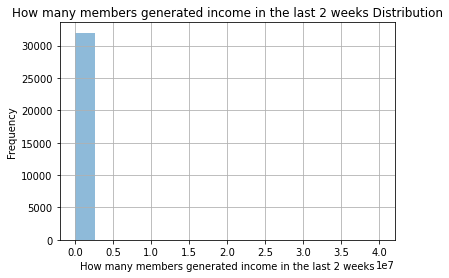

In [ ]:
inspect("How many members generated income in the last 2 weeks")
#Negative values

## Variable 52: What is the total income generated on monthly basis

------------------------------PRINT ALL AND TYPE-----------------------------------
0              0.0
1         500000.0
2        1000000.0
3              0.0
4              0.0
           ...    
32074     700000.0
32075     800000.0
32076     900000.0
32077    6000000.0
32078          0.0
Name: What is the total income generated on monthly basis, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 2100000303.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
1697
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.05290065151656847
-------------------------DISTRIBUTION OF VALUES---------------------------------


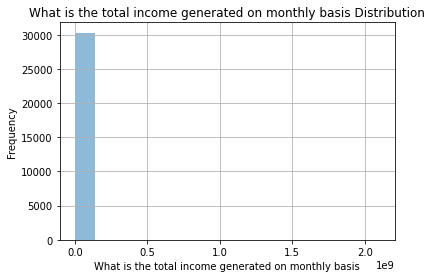

In [ ]:
inspect("What is the total income generated on monthly basis")

## Variable 53, 54: Do you have any saving? | How much?

In [ ]:
df["Do you have any saving?"] = toLowerCase(df, "Do you have any saving?")
inspect("Do you have any saving?")
# Make lower

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Do you have any saving?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'no' 'yes' 'refuse to answer ']
-------------------------NUMBER OF MISSING VALUES----------------------------------
25689
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.8008042644720845


------------------------------PRINT ALL AND TYPE-----------------------------------
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32074    0.0
32075    0.0
32076    0.0
32077    0.0
32078    0.0
Name: How much?, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 1000000000.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
6042
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.18834751706724026
-------------------------DISTRIBUTION OF VALUES---------------------------------


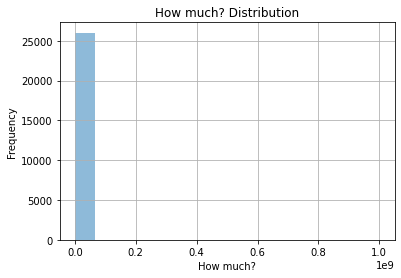

In [ ]:
inspect("How much?")

## Variable 55, 56: Did you receive any assistance since the incident | What type of assistance?

In [ ]:
df["Did you receive any assistance since the incident"] = toLowerCase(df, "Did you receive any assistance since the incident")
inspect("Did you receive any assistance since the incident")
#Make lower

------------------------------PRINT ALL AND TYPE-----------------------------------
0        yes
1        yes
2        yes
3        NaN
4        yes
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Did you receive any assistance since the incident, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['yes' nan 'no']
-------------------------NUMBER OF MISSING VALUES----------------------------------
23084
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.7195984912247888


In [ ]:
inspect("What type of assistance?")
# Since people can choose more than one option, its taking each combination of options as a different value

------------------------------PRINT ALL AND TYPE-----------------------------------
0        food
1        food
2        food
3        none
4        food
         ... 
32074    food
32075    none
32076    none
32077    none
32078    cash
Name: What type of assistance?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['food' 'none'
 'food,cash,water,clothes_and_shoes,transport,community_and_psychosocial'
 nan 'other' 'water' 'food,shelter' 'food,water' 'cash'
 'infant_formula_baby_food,food' 'infant_formula_baby_food,water,cash'
 'infant_formula_baby_food' 'food,cash' 'shelter' 'cash,food'
 'food,infant_formula_baby_food' 'cash,food,infant_formula_baby_food'
 'cash,food,water' 'food,cash,water' 'infant_formula_baby_food,other'
 'clothes_and_shoes' 'food,cash,shelter,transport'
 'food,cash,shelter,clothes_and_shoes'
 'food,cash,shelter,community_and_psychosocial' 'shelter,food,cash,other'
 'cash,shelter' 'food,water,other' 

## Variable 57, 58: Can you estimate how many days your current income, savings and assets can sustain your needed minimum expenditures without additional help? | How many?

In [ ]:
inspect("Can you estimate how many days your current income, savings and assets can sustain your needed minimum expenditures without additional help?")
# Spellings and language

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074     no
32075     no
32076    yes
32077     no
32078     no
Name: Can you estimate how many days your current income, savings and assets can sustain your needed minimum expenditures without additional help?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'no' 'yes' 'refuse_to_answer' 'كلا' 'Between 14 and 30 days'
 'Less than 7 days' 'No financial help needed'
 'Relatives send money usually ' 'No need for assistance ' 60
 'No need for help' 'عشرة ايام' '6 days ' 'اقل من شهر'
 'live everyday and its day ' 'اسبوع' 'No' 'Nothing ' 'More than 365 days'
 4 'between 14 and 30 days' 'X' 'لا' 'All' 'whole month' 'نعن' 'Cash'
 'Yes' 'sustainable' 'نعم' 'طعام و شراب' 'شهر' 'one week' 9 'none'
 '٤ شهور ' 'شهر كامل' 'لا يوجد مدخول ' 3 'الشهر كامل' 'عشرة أيام'
 'On

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    7.0
32077    NaN
32078    NaN
Name: How many?, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN -30.0
MAX 450000000.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
25641
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.7993079584775087
-------------------------DISTRIBUTION OF VALUES---------------------------------


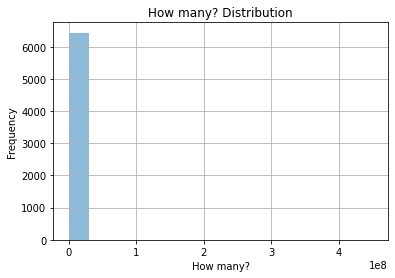

In [ ]:
inspect("How many?")
#What does this mean
#Negative values

# BASIC NEEDS

## Variable 59 - 65: What are the basic needs you will have the most difficulties meeting in the coming 7 days (Rank 1st, 2nd and 3rd)? 

In [ ]:
inspect("What are the basic needs you will have the most difficulties meeting in the coming 7 days (Rank 1st, 2nd and 3rd)?")
# Spelling, language. Maybe best to categorize them

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: What are the basic needs you will have the most difficulties meeting in the coming 7 days (Rank 1st, 2nd and 3rd)?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'الطعام' 'المال' 'Food and electric maintenance ' 'N/a' 'Food' 'Na'
 'Money' 'Medication, meat, and other goods' 'Nothing'
 '1-Rent 2- food assistance '
 '1-Rent 2- Food assistance - 3-diapers and milk'
 '1-medications 2-food asiatance 3- medical support'
 '1-Medications 2- food assisstance ' '1-Rent 2- food assistance -Milk '
 '1-Travel 2-rent-food assistance' 'ادوية، مازوت، مواد تنظيف، '
 'Medicine , food, water ' 'تامين الدواء' 'Rent for house'
 'علاج فزيائي للطفل، اجار بيت' 'Rent for house, food, medicals'
 '1. Rent  2nd he

In [ ]:
inspect("First priority")
#Make lower

------------------------------PRINT ALL AND TYPE-----------------------------------
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
32074    Cash
32075    Food
32076    Cash
32077    Cash
32078    Cash
Name: First priority, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'None' 'Cash' 'Shelter_Repairs' 'Medication' 'Food' 'Medical_care'
 'Other' 'Drinking_water' 'Shelter' 'Electricity' 'Income/livelihood'
 'Hygiene_Kit'
 'Care_for_familiy_members_with_special_needs_(e.g._children,_elders,_people_with_disabilities_or_chronically_ill,_pregnant_and_lactating_women)'
 'Bedding/blankets' 'Toilets' 'Clothes'
 'Information_on_how_aid_is_provided' 'Bedding/Blankets' 'Education'
 'MEdication' 'Income/Livelihood' 'Drinking_Water' 'food']
-------------------------NUMBER OF MISSING VALUES----------------------------------
2208
-------------------------PERCENT OF MISSING VALUES-----------------

In [ ]:
inspect("Please specify")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Please specify, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'Psychology ' 'Kid_Necessity' 'Glass' 'Household_Items'
 'Medications: gentle relief/ chondrovital/ calcium 600 mg/ aspirin avenzor 81 mg/magnesal plus/ diclo-neurobion'
 'Education' 'Rent' 'Cancer' 'Emigration' 'Hearing aids' 'Migration'
 'Earpiece' 'Security' 'Other' "They can't paid the rent" 'حفاضات ' 'None'
 'Job vacancy' 'Baby milk diapers' 'milk and diapers' 'Nothing ' 'Nothing'
 'He needs nothing ' 'No need' 'Baby kits' 'School payments'
 'Cash for schools' 'الولادة' 'لا شيء' '.' 'مشكلة مزمنة في العين' '0'
 'مدارس' 'Rent fees' 'Milk for the baby' 'University fees' ' nothing'
 '0000' '000' '00' 'All good' 'ايجار البيت'

In [ ]:
inspect("Second priority")

------------------------------PRINT ALL AND TYPE-----------------------------------
0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
              ...       
32074               Food
32075    Shelter_Repairs
32076               Food
32077         Medication
32078               Food
Name: Second priority, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'None' 'Hygiene_Kit' 'Medication' 'Medical_care' 'Food'
 'Shelter_Repairs' 'Cash' 'Other'
 'Care_for_familiy_members_with_special_needs_(e.g._children,_elders,_people_with_disabilities_or_chronically_ill,_pregnant_and_lactating_women)'
 'Electricity' 'Income/livelihood' 'Drinking_water' 'Shelter' 'Clothes'
 'Information_on_how_aid_is_provided' 'Bedding/blankets' 'Education'
 'Toilets' 'Medical_Care' 'Drinking_Water' 'electricity' ' '
 'Electricity ']
-------------------------NUMBER OF MISSING VA

In [ ]:
inspect("Please specify5")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Please specify5, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'Security' 'Medications' 'First Aid' 'Adult diapers' 'psychological '
 'Kid_Necessity' 'Plumbing' 'Rent of the house' 'Rent' 'Hearing aids'
 'Household_Items' 'School and books ' 'None' 'School' 'قرض'
 'دفع اقساط المدرسة' 'AC air condtion' 'Nothing ' 'Noth8ng' '.'
 'Needs nothing ' '0' 'No need' 'Job' 'Nothing' 'لا شيء' 'Education'
 'NOTHING' 'Rent fees' '00000' '000' '0000' 'Fix shattered glass' 'tv'
 'glass' 'Fan' 'No needs' 'Fridge' 'Milk and diapers' 'Baby milk/diabers'
 'Milk 4 year old girl' 'Not in need of anything specific'
 'Nothing specific' 'Other' 'No' 'اعانة اهله الضررين '
 'Cleaning equipement' 'nothing' '٠' 'M

In [ ]:
inspect("Third priority")

------------------------------PRINT ALL AND TYPE-----------------------------------
0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
32074     Hygiene_Kit
32075     Electricity
32076     Hygiene_Kit
32077    Medical_care
32078     Hygiene_Kit
Name: Third priority, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'None' 'Income/livelihood' 'Food' 'Electricity' 'Medication'
 'Medical_care' 'Cash' 'Drinking_Water' 'Hygiene_Kit' 'Shelter_Repairs'
 'Other' 'Bedding/blankets' 'Drinking_water'
 'Care_for_family_members_with_special_needs_(e.g._children,_elders,_people_with_disabilities_or_chronically_ill,_pregnant_and_lactating_women)'
 'Information_on_how_aid_is_provided' 'Clothes' 'Shelter' 'Education'
 'MEdical_Care' 'Medical_Care'
 'Care_for_familiy_members_with_special_needs_(e.g._children,_elders,_people_with_disabilities_or_chronically_

In [ ]:
inspect("Please specify6")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Please specify6, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'Kid_Items' 'Household_Items' 'Kid_Necessity'
 'Medications: gentle relief/ chondrovital/ calcium 600 mg/ aspirin avenzor 81 mg/magnesal plus/ diclo-neurobion'
 'Glasses' 'School' 'food and income ( very old people in need ) '
 'Dog food' 'Glass for the window ' 'Rent' 'Asthma spray' 'Oxygen machine'
 'Diapers for elderly ' 'Pampers' 'Open Heart Child ' 'Psycological'
 'Fuel' 'Shcool' 'Internet' 'اشتركات' 'None'
 'Repairing the kitchen and toilet' 'none' 'kids necessities'
 'a larger water tank' 'حليب اطفال' 'حفاضات و حليب' 'قرض' 'حليب'
 'رعاية ولدنا' 'Nothing ' 'stationnery school' 'school' 'Nothing' '.'
 'لم يتم التحديد' '

# HOUSE DAMAGE / CONDITION

## Variable 66: How many apartments are on the same floor? 

------------------------------PRINT ALL AND TYPE-----------------------------------
0        2.0
1        2.0
2        2.0
3        1.0
4        1.0
        ... 
32074    5.0
32075    2.0
32076    2.0
32077    0.0
32078    2.0
Name: How many apartments are on the same floor?, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 100002.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
7198
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.2243835531032763
-------------------------DISTRIBUTION OF VALUES---------------------------------


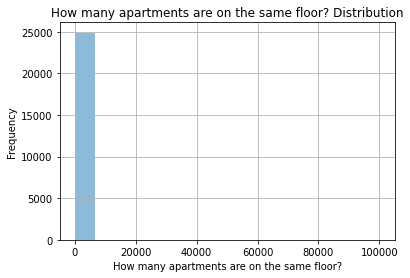

In [ ]:
inspect("How many apartments are on the same floor?")

## Variable 67: Is there a migrant worker or domenstic helper living with this household?

In [ ]:
inspect("Is there a migrant worker or domenstic helper living with this household? ")

------------------------------PRINT ALL AND TYPE-----------------------------------
0         no
1         no
2        yes
3         no
4         no
        ... 
32074     no
32075     no
32076     no
32077     no
32078     no
Name: Is there a migrant worker or domenstic helper living with this household? , Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['no' 'yes' nan]
-------------------------NUMBER OF MISSING VALUES----------------------------------
8724
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.27195361451416816


## Variable 68: Have you or any household member damaged/lost any personal documents? 

In [ ]:
inspect("Have you or any household member damaged/lost any personal documents?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        yes
1         no
2         no
3         no
4         no
        ... 
32074     no
32075     no
32076     no
32077     no
32078     no
Name: Have you or any household member damaged/lost any personal documents?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['yes' 'no' nan]
-------------------------NUMBER OF MISSING VALUES----------------------------------
8724
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.27195361451416816


# INFANTS

## Variable 69: Total number of members 0-12 months

------------------------------PRINT ALL AND TYPE-----------------------------------
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32074    0.0
32075    1.0
32076    0.0
32077    0.0
32078    0.0
Name: Total number of members 0-12 months, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 233.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
11513
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.35889522740733815
-------------------------DISTRIBUTION OF VALUES---------------------------------


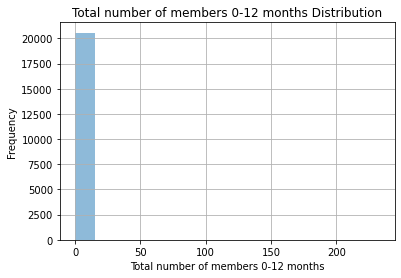

In [ ]:
inspect("Total number of members 0-12 months")

## Variable 70: Did the children (0-12) receive vaccinations? 

In [ ]:
inspect("Did the children (0-12) receive vaccinations?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    yes
32076    NaN
32077    NaN
32078    NaN
Name: Did the children (0-12) receive vaccinations?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'yes' 'no']
-------------------------NUMBER OF MISSING VALUES----------------------------------
31042
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.9676735559088501


## Variable 71: Number of children not planning on going to school (despite being school aged)

------------------------------PRINT ALL AND TYPE-----------------------------------
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32074    0.0
32075    0.0
32076    0.0
32077    0.0
32078    0.0
Name: Number of children not planning on going to school (despite being school aged), Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 4.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
7121
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.22198322890364414
-------------------------DISTRIBUTION OF VALUES---------------------------------


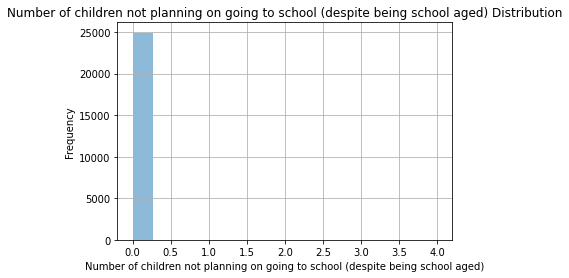

In [ ]:
inspect("Number of children not planning on going to school (despite being school aged)")

# SAFETY

## Variable 72, 73: How has the Beirut explosion affected you and your household? (select all that apply) | Other, please specify7  

In [ ]:
inspect("How has the Beirut explosion affected you and your household? (select all that apply)")
# Since people can choose more than one option, its taking each combination of options as a different value

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: How has the Beirut explosion affected you and your household? (select all that apply), Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'psychological_distress' 'physical_injury,psychological_distress'
 'psychological_distress,physical_injury' 'psychological_distress,hosting'
 'missing_family_member' 'other' 'physical_injury'
 'physical_injury,other,psychological_distress'
 'psychological_distress,other' 'hosting,psychological_distress'
 'other,psychological_distress'
 'physical_injury,psychological_distress,hosting' 'other,physical_injury'
 'hosting' 'physical_injury,other' 'physical_injury,hosting'
 'other,hosting' 'psychological_distress,physical_injury,other']
-------------------------

In [ ]:
inspect("Other, please specify7")
#Language/ spelling

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Other, please specify7, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'لا شيئ' 'لا يوجد' 'لا يوجد ' 'اضرار منزلية' 'خوف لدى الابناء'
 'خوف لدى الاطفال' 'خوف' 'Nothing' 'الطفلة بحاجة  الي مساعده نفسيه'
 'لا احد' ' nothing' 'unjuries member family' 'fear for the children'
 'feers' 'مرض نفسي' 'Asthma crisis' 'Only housing' 'نفسيا' 'Home damage'
 'Home damage ' 'Housing' 'No damage' 'none' 'none ' 'مرض نفسي (الأولاد)'
 'Objects' 'Lost some material like washing machine' 'Nothing ' 'None'
 'أضرار في البيت' 'psychologically' 'غير متواجدين في البيت'
 'Broken glass ' 'House damages ' 'لاشيء ' 'نفسي' 'Walls'
 'غير قادر على أكل الطعام' 'لا ضرر' 'مرض نفسية' 'إصابة نفسية' 'No one'
 'ال شئ' 'لاشي' '

## Variable 74: Question about protection safety and security: Do you have any concerns about your protection/safety?

In [ ]:
inspect("Question about protection safety and security: Do you have any concerns about your protection/safety? ")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Question about protection safety and security: Do you have any concerns about your protection/safety? , Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'no' 'yes']
-------------------------NUMBER OF MISSING VALUES----------------------------------
31745
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.9895882041210761


## Variable 75: Have you or anyone you know reported sexual or gender based violence/ abuse/ exploitation?

In [ ]:
inspect("Have you or anyone you know reported sexual or gender based violence/ abuse/ exploitation?")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Have you or anyone you know reported sexual or gender based violence/ abuse/ exploitation?, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'no' 'yes']
-------------------------NUMBER OF MISSING VALUES----------------------------------
31745
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.9895882041210761


## Variable 76: Does the house/appartment allow for privacy and safety? 

In [ ]:
inspect("Does the house/appartment allow for privacy and safety? ")

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Does the house/appartment allow for privacy and safety? , Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
[nan 'yes' 'no']
-------------------------NUMBER OF MISSING VALUES----------------------------------
31754
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.9898687614950591


# OCCUPANTS DETAILS (BY GENDER)

## Variable 77: Total number of apartments in the building

------------------------------PRINT ALL AND TYPE-----------------------------------
0        14.0
1        14.0
2        14.0
3         5.0
4         2.0
         ... 
32074     5.0
32075     3.0
32076    20.0
32077     0.0
32078    18.0
Name: Total number of apartments in the building, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 423.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
7837
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.24430312665606782
-------------------------DISTRIBUTION OF VALUES---------------------------------


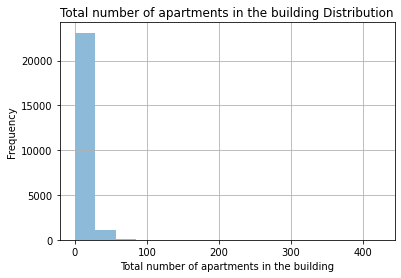

In [ ]:
inspect("Total number of apartments in the building")

## Variable 78: Total number of male members living now under the same roof (INCLUDING Head of Household)

------------------------------PRINT ALL AND TYPE-----------------------------------
0        1.0
1        0.0
2        1.0
3        2.0
4        3.0
        ... 
32074    1.0
32075    2.0
32076    2.0
32077    1.0
32078    2.0
Name: Total number of male members living now under the same roof (INCLUDING Head of Household), Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 211.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
9002
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.2806197200660869
-------------------------DISTRIBUTION OF VALUES---------------------------------


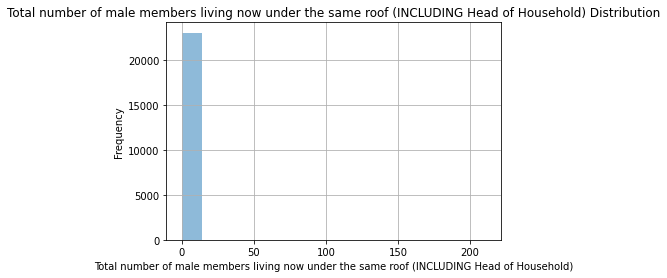

In [ ]:
inspect("Total number of male members living now under the same roof (INCLUDING Head of Household)")

## Variable 79: Total number of female members living now under the same roof (INCLUDING Head of Household)

------------------------------PRINT ALL AND TYPE-----------------------------------
0        2.0
1        1.0
2        1.0
3        3.0
4        1.0
        ... 
32074    4.0
32075    2.0
32076    1.0
32077    2.0
32078    3.0
Name: Total number of female members living now under the same roof (INCLUDING Head of Household), Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 23.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
9002
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.2806197200660869
-------------------------DISTRIBUTION OF VALUES---------------------------------


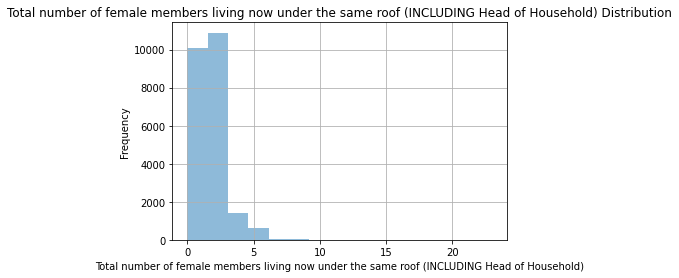

In [ ]:
inspect("Total number of female members living now under the same roof (INCLUDING Head of Household)")

## Variable 80: Number Male chronically ill people/with critical medical conditions

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        0.0
2        NaN
3        NaN
4        1.0
        ... 
32074    0.0
32075    NaN
32076    0.0
32077    1.0
32078    1.0
Name: Number Male chronically ill people/with critical medical conditions, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 22.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
19389
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.6044141026839989
-------------------------DISTRIBUTION OF VALUES---------------------------------


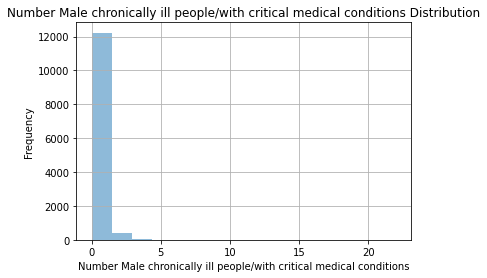

In [ ]:
inspect("Number Male chronically ill people/with critical medical conditions")

## Variable 81: Number Female chronically ill people/with critical medical conditions

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        1.0
2        NaN
3        NaN
4        0.0
        ... 
32074    1.0
32075    NaN
32076    1.0
32077    1.0
32078    0.0
Name: Number Female chronically ill people/with critical medical conditions, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 110.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
19144
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.5967767075033511
-------------------------DISTRIBUTION OF VALUES---------------------------------


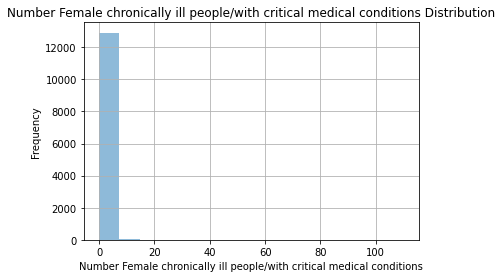

In [ ]:
inspect("Number Female chronically ill people/with critical medical conditions")

## Variable 82: Number of Male with non-disaster related physical and permanent disability

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        1.0
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Number of Male with non-disaster related physical and permanent disability, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 8.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
29745
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.9272421210137474
-------------------------DISTRIBUTION OF VALUES---------------------------------


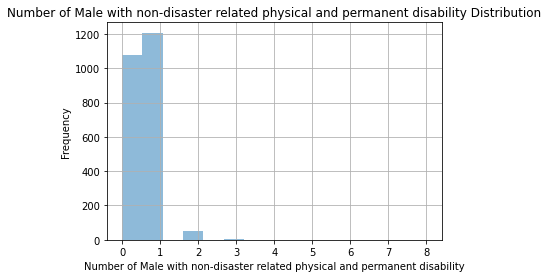

In [ ]:
inspect("Number of Male with non-disaster related physical and permanent disability")

## Variable 83: Number of Female with non-disaster related physical and permanent disability

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        1.0
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Number of Female with non-disaster related physical and permanent disability, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 10.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
29740
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.927086255805979
-------------------------DISTRIBUTION OF VALUES---------------------------------


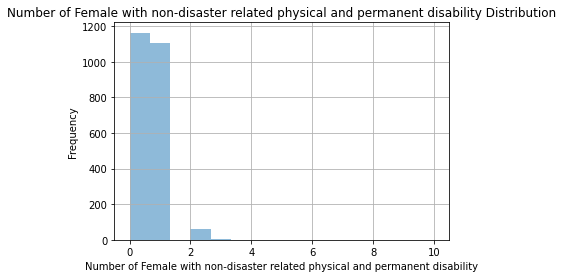

In [ ]:
inspect("Number of Female with non-disaster related physical and permanent disability")

## Variable 84: Number of Male with disaster related physical and permanent disability

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        0.0
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Number of Male with disaster related physical and permanent disability, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN -1.0
MAX 9.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
29882
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.9315128277065994
-------------------------DISTRIBUTION OF VALUES---------------------------------


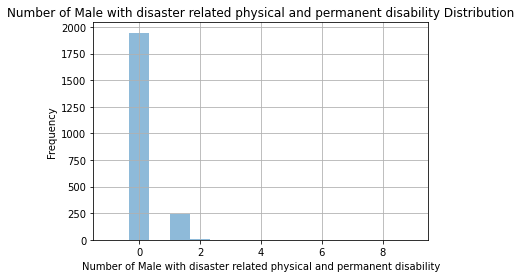

In [ ]:
inspect("Number of Male with disaster related physical and permanent disability")
# Negative values

## Variable 85: Number of Female with disaster related physical and permanent disability

------------------------------PRINT ALL AND TYPE-----------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        0.0
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Number of Female with disaster related physical and permanent disability, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 10.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
29880
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.931450481623492
-------------------------DISTRIBUTION OF VALUES---------------------------------


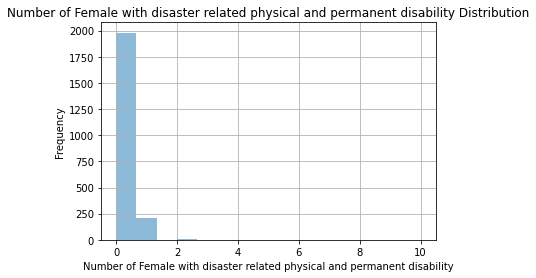

In [ ]:
inspect("Number of Female with disaster related physical and permanent disability")

## Variable 86: How many Male members need medication?

------------------------------PRINT ALL AND TYPE-----------------------------------
0        0.0
1        0.0
2        NaN
3        NaN
4        NaN
        ... 
32074    0.0
32075    NaN
32076    0.0
32077    1.0
32078    1.0
Name: How many Male members need medication?, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 9.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
23050
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.7185386078119642
-------------------------DISTRIBUTION OF VALUES---------------------------------


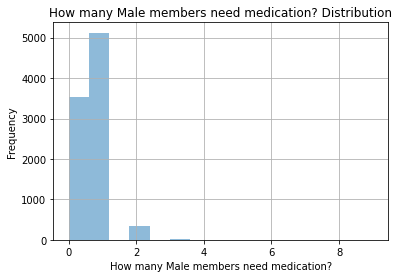

In [ ]:
inspect("How many Male members need medication?")

## Variable 87: How many Female members need medication?

------------------------------PRINT ALL AND TYPE-----------------------------------
0        0.0
1        1.0
2        NaN
3        NaN
4        NaN
        ... 
32074    1.0
32075    NaN
32076    1.0
32077    1.0
32078    0.0
Name: How many Female members need medication?, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 15.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
22776
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.7099971944262602
-------------------------DISTRIBUTION OF VALUES---------------------------------


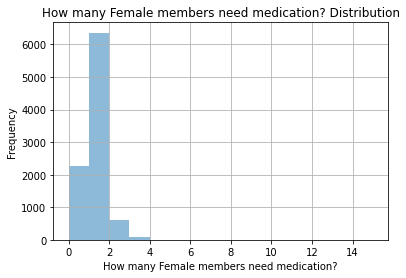

In [ ]:
inspect("How many Female members need medication?")

## Variable 88: How many Male members generated income in the last 2 weeks

------------------------------PRINT ALL AND TYPE-----------------------------------
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32074    0.0
32075    1.0
32076    1.0
32077    0.0
32078    1.0
Name: How many Male members generated income in the last 2 weeks, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN -1.0
MAX 2500000.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
10498
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.3272545902303688
-------------------------DISTRIBUTION OF VALUES---------------------------------


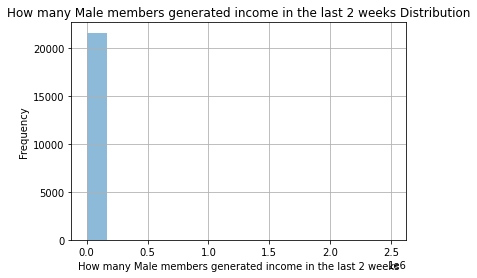

In [ ]:
inspect("How many Male members generated income in the last 2 weeks")
#Negative values

## Variable 89: How many Female members generated income in the last 2 weeks

------------------------------PRINT ALL AND TYPE-----------------------------------
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32074    1.0
32075    0.0
32076    0.0
32077    1.0
32078    0.0
Name: How many Female members generated income in the last 2 weeks, Length: 32079, dtype: float64
-------------------------------RANGE OF VALUES---------------------------------------
MIN 0.0
MAX 1000000.0
-------------------------NUMBER OF MISSING VALUES----------------------------------
11344
-------------------------PERCENT OF MISSING VALUES---------------------------------
0.35362698338476883
-------------------------DISTRIBUTION OF VALUES---------------------------------


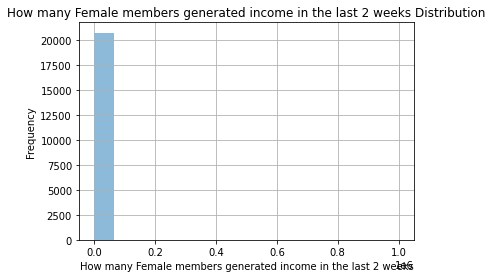

In [ ]:
inspect("How many Female members generated income in the last 2 weeks")

## Variable 90: Specify other partner

In [ ]:
inspect("Specify other partner")
#Spelling and language

------------------------------PRINT ALL AND TYPE-----------------------------------
0        ACF
1        ACF
2        ACF
3        NaN
4        NaN
        ... 
32074    NaN
32075    NaN
32076    NaN
32077    NaN
32078    NaN
Name: Specify other partner, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['ACF' nan 'Nabaa' 'Acf' 'bau and nabaa' '0' 'Iom' 'IOM' 'نبع' 'مبع' 'Ikm'
 'Nabeaa' 'ION' 'Bassel and dayane' 'Nbeaa' 'IoM' 'Gvc' 'GVC'
 'Rana Shreif' 'نبع ' 'Naba’a' 'Naba’a ' 'Io.' 'Nazlia ismail'
 'Borj hammoud' 'Nadine Majd' 'نيع' "Naba'a " "Naba'a" 'IOM ' 'Sin el fil'
 'وسيلة أحمد حمد ' 'برج حمود' 'Sheild' 'ACf' 'Iom ' 'Sheild '
 'Sheild team 2' 'Ion' 'Chahnaz ahmd' 'ACC' 'Iomo' 'Shield'
 'Bourj hammoud' 'KOM' 'Oim' 'Sheildteam7' 'Nehmat bakhos' 'sheild'
 'Narmin' 'Narmine' 'Sheildteam3' ' iom' 'Bilal' 'Sheilf' 'عبدالله عبيد'
 'iom' 'سن الفيل' 'Sheild*' 'سن الفيل ' 'Basta' 'Delta' 'gvc' 'geitawi'
 'delta' 'Msaytbe' 'I

## Variable 91, 92: Creation Date | Creator

In [ ]:
# inspect("CreationDate")

In [ ]:
inspect("Creator")

------------------------------PRINT ALL AND TYPE-----------------------------------
0         acfspain.guest
1         acfspain.guest
2         acfspain.guest
3        unhabitat.guest
4             pcpm.guest
              ...       
32074            dms.lrc
32075            dms.lrc
32076            dms.lrc
32077            dms.lrc
32078            dms.lrc
Name: Creator, Length: 32079, dtype: object
-------------------------------UNIQUE VALUES---------------------------------------
['acfspain.guest' 'unhabitat.guest' 'pcpm.guest' 'youth1.lrc' 'youth.lrc'
 'dms.lrc' 'youth2.lrc' 'savethechildren.guest' 'medair.guest'
 'intersos.guest' 'iom.guest' 'lebrelief.guest' 'solidarite.guest'
 'iom1.guest' 'acted.guest' 'cww.guest' 'gvc.guest' 'nawaya.guest'
 'WFP.guest' 'puami.guest' 'dms1.lrc' 'dmu.beirut' 'dmu.hasbaya'
 'dmu.akkar' 'dmu.cpp' 'dmu.keserwan' 'youth4.lrc' nan 'LRC.GIS'
 'youth3.lrc' 'FW.Ibrahim']
-------------------------NUMBER OF MISSING VALUES----------------------------------
